In [9]:
from pathlib import Path
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tqdm.notebook import tqdm

In [10]:
labels = pd.read_csv("stage_2_train_labels.csv")

In [11]:
labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [12]:
labels=labels.drop_duplicates("patientId")

In [13]:
ROOT_PATH=Path("04-Pneumonia-Classification/stage_2_train_images/")
SAVE_PATH=Path("04-Pneumonia-Classification/ME")

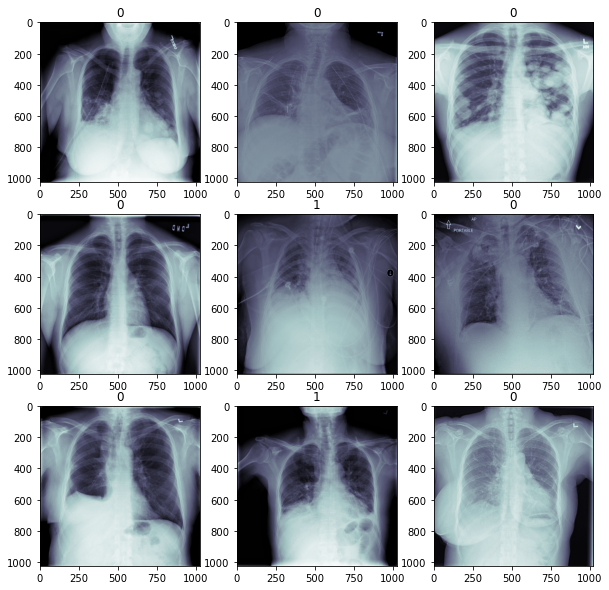

In [14]:
fig,axis= plt.subplots(3,3, figsize = (10,10))
c=0
for i in range(3):
    for j in range(3):
        patient_id=labels.patientId.iloc[c]
        dcm_path = ROOT_PATH/patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        data=pydicom.read_file(dcm_path).pixel_array  
        label=labels.Target.iloc[c]
        axis[i][j].imshow(data,cmap="bone")
        axis[i][j].set_title(label)
        c+=1

In [20]:
sums, sums_squared=0,0
for c, patient_id in enumerate(tqdm(labels.patientId)):
        patient_id=labels.patientId.iloc[c]
        dcm_path = ROOT_PATH/patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        dcm=pydicom.read_file(dcm_path).pixel_array/255
        
        dcm_array=cv2.resize(dcm,(224,224)).astype(np.float16)
        label=labels.Target.iloc[c]
        train_or_val = "train" if c<24000 else "val"
        current_save_path = SAVE_PATH/train_or_val/str(label)
        current_save_path.mkdir(parents=True,exist_ok=True)
        np.save(current_save_path/patient_id, dcm_array)
        
        normalizer=224*224
        if train_or_val == "train":
            sums+=np.sum(dcm_array)/normalizer
            sums_squared+= (dcm_array**2).sum() / normalizer
            
        
    

  0%|          | 0/26684 [00:00<?, ?it/s]

In [23]:
mean=sums/24000
std=np.sqrt((sums_squared/24000-mean**2))

In [24]:
mean, std

(0.4903962485384803, 0.24795070634161256)